In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import operator

from functools import reduce

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

import plotly.graph_objects as go
from ipywidgets import widgets
# from IPython.display import display

from matplotlib import pyplot as plt

import networkx as nx
from pprint import pprint

In [3]:
from giotto.mapper.mapper import make_mapper_pipeline
from giotto.mapper.visualize import create_network_2d, create_interactive_network

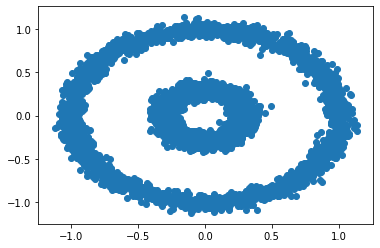

In [4]:
data, labels = make_circles(n_samples=5000, noise=0.05, factor=0.3)

plt.scatter(data[:,0], data[:, 1]);

In [5]:
pipe = make_mapper_pipeline()

In [6]:
# pprint(pipe.get_mapper_params())

In [7]:
# pipe.set_mapper_params(**{'clusterer__metric':'l1'})

In [8]:
# graph = pipe.fit_transform(data)

# node_elements = nx.get_node_attributes(graph, 'elements')
# node_sizes = [len(el) for el in node_elements.values()]
# node_colors = [np.mean(data[el]) for el in node_elements.values()]
# node_text = [k for k in node_elements.keys()]


# pos = nx.kamada_kawai_layout(graph, dim=2)

# fig = create_network_2d(graph, pos, node_sizes, node_colors, node_sizes, node_scale=20)

# fig.show()

## Iteration 1: Interactivity for giotto-learn--specific transformers

## 1.1: OneDimensionalCover

In [9]:
plotly_kwargs = {
    'colorscale':'RdBu'
}

create_interactive_network(pipe, data)

## Configure clustering params

In [10]:
pipe.get_mapper_params()

{'memory': None,
 'verbose': False,
 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'filter_func': PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 'cover': CubicalCover(n_intervals=10, overlap_frac=0.1),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'filter_func__copy': True,
 'filter_func__iterated_power': 'auto',
 'filter_func__n_components': 2,
 'filter_func__random_state': None,
 'filter_func__svd_solver': 'auto',
 'filter_func__tol': 0.0,
 'filter_func__whiten': False,
 'cover__n_intervals': 10,
 'cover__overlap_frac': 0.1,
 'clusterer__algorithm': 'auto',
 'clusterer__eps': 0.5,
 'clusterer__leaf_size': 30,
 'clusterer__metric': 'euclidean',
 'clusterer__metric_params': None,
 'clusterer__min_samples': 5,
 'clusterer__n_jobs': None,
 'clusterer__p': None,
 'clusterer': DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
        metric_params=None, min_samples=5, n_jobs

In [11]:
cover_params = dict(filter(lambda x: x[0].startswith('cover'),
                           pipe.get_mapper_params().items()))

# cover_params_widgets = dict(
#     filter(None, map(lambda x: get_cover_params_widgets(*x),
#                      cover_params.items())))

cluster_params = dict(filter(lambda x: x[0].startswith('clusterer'),
                             pipe.get_mapper_params().items()))

# cluster_params_widgets = dict(
#     filter(None, map(lambda x: get_cluster_params_widgets(*x),
#                      cluster_params.items())))

In [12]:
cover_params.items()

dict_items([('cover', CubicalCover(n_intervals=10, overlap_frac=0.1)), ('cover__n_intervals', 10), ('cover__overlap_frac', 0.1)])

In [13]:
cluster_params = {key: item for key, item in pipe.get_mapper_params(
).items() if key.startswith('clusterer')}

In [14]:
cluster_params.items()

dict_items([('clusterer__algorithm', 'auto'), ('clusterer__eps', 0.5), ('clusterer__leaf_size', 30), ('clusterer__metric', 'euclidean'), ('clusterer__metric_params', None), ('clusterer__min_samples', 5), ('clusterer__n_jobs', None), ('clusterer__p', None), ('clusterer', DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None))])

In [15]:
for param, value in cluster_params.items():
    if isinstance(value, float):
        print(param, value)

clusterer__eps 0.5


In [16]:
for param, value in cluster_params.items():
    if isinstance(value, int):
        print(param, value)

clusterer__leaf_size 30
clusterer__min_samples 5


In [17]:
for param, value in cluster_params.items():
    if isinstance(value, str):
        print(param, value)

clusterer__algorithm auto
clusterer__metric euclidean


In [18]:
import inspect

In [19]:
hyperparams = inspect.signature(cluster_params['clusterer'].__init__)

In [20]:
hyperparams

<Signature (eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)>